In [2]:
import numpy as np
import itertools
import hashlib

In [42]:
a = np.array([[1, 2, 3], [1, 2, 3]])

array([[1, 2, 3],
       [1, 2, 3]])

In [10]:
from jupyterthemes import jtplot
jtplot.style()

In [11]:
def read_data(n, k):
    chs = np.zeros((k, n), dtype=np.int8)
    rsps = np.zeros(k, dtype=np.int8)
    
    with open('data/raw/Base{}.txt'.format(n), 'r') as f:
        for i, line in enumerate(itertools.islice(f, k)):
            ch, rsp = line.split(' ')
            for j, e in enumerate(ch):
                chs[i, j] = int(e)
            rsps[i] = int(rsp)
            
    return chs, rsps

def to_signed(x):
    p = np.zeros_like(x, dtype=np.int8)
    x = 1 - 2 * x
    
    p[0] = x[0]
    for i in range(1, len(x)):
        p[i] = p[i - 1] * x[i]
    return p

In [12]:
data = {
    "raw": {},
    "signed": {},
}

In [13]:
for n in range(8, 129, 8):
    data['raw'][n] = read_data(n, 10 ** 3)
    print(n)

8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128


In [14]:
for n in range(8, 129, 8):
    x, y = data['raw'][n]
    data['signed'][n] = ([to_signed(e) for e in x], y)
    print(n)

8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

def train_model_1(model, x_train, x_test, y_train, y_test, *args, **kwargs):
    accuracy = {}
    
    nn = np.log2(len(x_train))
    nn = [int(2 ** n) for n in np.arange(4, int(nn) + 1.5, 0.8)]
    for n in nn:
        m = model(*args, **kwargs)
        m.fit(x_train[:n], y_train[:n])

        y_pred = m.predict(x_test)
        accuracy[n] = accuracy_score(y_test, y_pred)
        print(n)
        
    return accuracy

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
from collections import defaultdict

models = defaultdict(dict)

In [17]:
x, y = data['signed'][128]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9)

In [18]:
models[128]["Logistic Regiression"] = train_model_1(LogisticRegression, x_train, x_test, y_train, y_test)

16
27
48
84
147


In [19]:
models[128]["SVM"] = train_model_1(SVC, x_train, x_test, y_train, y_test, kernel='linear')

16
27
48
84
147


In [20]:
models[128]["Gradient Boosting"] = train_model_1(GradientBoostingClassifier, x_train, x_test, y_train, y_test)

16
27
48
84
147


In [21]:
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = 100

fig = plt.figure()
fig.set_size_inches(15, 20)

plot_data = models[64]
for i, ((model_name, result), marker) in enumerate(zip(plot_data.items(), ['o', 's', '^'])):
    ax = fig.add_subplot(len(plot_data), 1, i + 1)
    
    ax.set(xlabel='Training Set Size', ylabel='Accuracy')
    ax.set_xscale('log')
    ax.set_yticks(np.arange(0.5, 1.04, 0.05))

    ax.axhline(0.95, ls='--', color='purple', linewidth=2, alpha=0.5)
    ax.axhline(1, ls='--', color='brown', linewidth=2, alpha=0.5)
    ax.plot(
        result.keys(), 
        result.values(), 
        '-{}'.format(marker),
        markersize=10,
        label=model_name, 
        linewidth=2
    )
    ax.set_xticks(list(result.keys())[::2])
    ax.set_xticklddabels(list(result.keys())[::2])

    ax.grid()
    ax.legend(loc='lower center')
    
plt.show()

<Figure size 1080x1440 with 0 Axes>

In [1]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = 100

fig = plt.figure()
fig.set_size_inches(15, 20)

plot_data = models[128]
for i, ((model_name, result), marker) in enumerate(zip(plot_data.items(), ['o', 's', '^'])):
    ax = fig.add_subplot(len(plot_data), 1, i + 1)
    
    ax.set(xlabel='Training Set Size', ylabel='Accuracy')
    ax.set_xscale('log')
    ax.set_yticks(np.arange(0.5, 1.04, 0.05))

    ax.axhline(0.95, ls='--', color='purple', linewidth=2, alpha=0.5)
    ax.axhline(1, ls='--', color='brown', linewidth=2, alpha=0.5)
    ax.plot(
        result.keys(), 
        result.values(), 
        '-{}'.format(marker),
        markersize=10,
        label=model_name, 
        linewidth=2
    )
    ax.set_xticks(list(result.keys())[::2])
    ax.set_xticklabels(list(result.keys())[::2])

    ax.grid()
    ax.legend(loc='lower center')

plt.show()

NameError: name 'plt' is not defined

In [47]:
def train_model_2(model, *args, **kwargs):
    accuracy = {}
    
    for n in range(8, 129, 8):
        x, y = data['signed'][n]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9)
        
        m = model(*args, **kwargs)
        m.fit(x_train, y_train)

        y_pred = m.predict(x_test)
        accuracy[n] = accuracy_score(y_test, y_pred)
        print(n)
    
    return accuracy

In [81]:
models_1 = {}

In [82]:
models_1["Logistic Regiression"] = train_model_2(LogisticRegression)

8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128


In [83]:
models_1["SVM"] = train_model_2(SVC, kernel='linear')

8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128


In [84]:
models_1["Gradient Boosting"] = train_model_2(GradientBoostingClassifier)

8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128


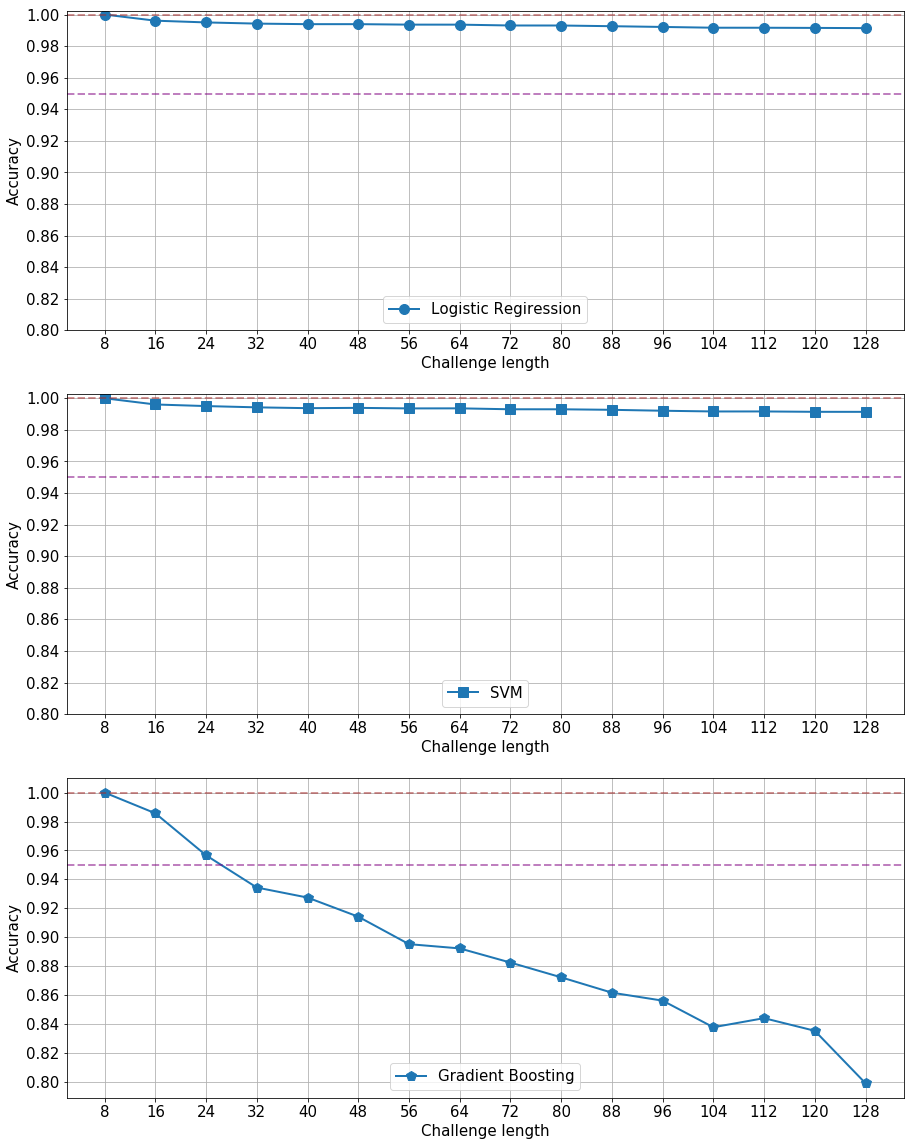

In [87]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = 100

fig = plt.figure()
fig.set_size_inches(15, 20)

plot_data = models_1
for i, ((model_name, result), marker) in enumerate(zip(plot_data.items(), ['o', 's', 'p'])):
    ax = fig.add_subplot(len(plot_data), 1, i + 1)
    
    ax.plot(
        result.keys(), 
        result.values(), 
        '-{}'.format(marker), 
        markersize=10, 
        label=model_name, 
        linewidth=2
    )
    ax.set_xticks(list(result.keys()))
    ax.set_xticklabels(list(result.keys()))
    

    ax.axhline(1, ls='--', color='brown', linewidth=2, alpha=0.5)
    ax.axhline(0.95, ls='--', color='purple', linewidth=2, alpha=0.5)

    ax.set(xlabel='Challenge length', ylabel='Accuracy')
    ax.set_yticks(np.arange(0.8, 1.01, 0.02))
    
    ax.grid()
    ax.legend(loc='lower center')
    
plt.show()